# Forecasting Future Long-Run Stock Returns with Robert Shiller's Cyclically Adjusted Price-Earnings Ratio (CAPE)

To use this notebook, click "Runtime" in the menu above, then choose "Run all" which will run all the code below from top to bottom. 

In [2]:
import pprint
import pandas as pd
from IPython.display import Image

## Data

In [3]:
print('Data current as of: {}'.format(pd.read_csv('https://raw.githubusercontent.com/nathanramoscfa/cape/main/data/as_of_date.csv').iloc[:, 1:].squeeze()))

Data current as of: 2022-09-30


In [4]:
fwd_return_5y_forecast = pd.read_csv('https://raw.githubusercontent.com/nathanramoscfa/cape/main/data/cape_return_forecast.csv', index_col=0)
fwd_return_5y_forecast.index.name = 'TICKER'

## Results Ranked by Forward Return 5-Year Forecast

These ETFs have an expected annualized 5-year return greater than 10%. 

In [5]:
print('ETFs with above 10% expected forward 5-year return:')
fwd_return_5y_forecast[fwd_return_5y_forecast.FWD_RETURN_5Y_FORECAST>=0.10].sort_values(by='FWD_RETURN_5Y_FORECAST', ascending=False).iloc[:None, :]

ETFs with above 10% expected forward 5-year return:


,ETF_NAME,INDEX_NAME,CAPE,FWD_RETURN_5Y_FORECAST,INDEX_TICKER
TICKER,,,,,
PSCD,Invesco S&P SmallCap Consumer Discretionary ETF,S&P 600 Consumer Discretionary Sector GICS Lev...,11.54,0.2516,S6COND
IJR,iShares Core S&P Small-Cap ETF,S&P Small Cap 600 Index,16.14,0.2041,SML
VIOO,Vanguard S&P Small-Cap 600 ETF,S&P Small Cap 600 Index,16.14,0.2041,SML
SLY,SPDR S&P 600 Small CapETF,S&P Small Cap 600 Index,16.14,0.2041,SML
SPSM,SPDR Portfolio S&P 600 Small Cap ETF,S&P Small Cap 600 Index,16.14,0.2041,SML
VIOG,Vanguard S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth Index,22.15,0.2001,SMLG
IJT,iShares S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth Index,22.15,0.2001,SMLG
SLYG,SPDR S&P 600 Small Cap Growth ETF,S&P Small Cap 600 Growth Index,22.15,0.2001,SMLG
VIOV,Vanguard S&P Small-Cap 600 Value ETF,S&P Small Cap 600 Value Index,13.18,0.1964,SMLV


These ETFs have an expected annualized 5-year return less than the S&P 500 Index. 

In [6]:
print('ETFs with expected forward 5-year return that is negative (below 0% annualized):')
fwd_return_5y_forecast[fwd_return_5y_forecast.FWD_RETURN_5Y_FORECAST<=0].sort_values(by='FWD_RETURN_5Y_FORECAST')

ETFs with expected forward 5-year return that is negative (below 0% annualized):


,ETF_NAME,INDEX_NAME,CAPE,FWD_RETURN_5Y_FORECAST,INDEX_TICKER
TICKER,,,,,
OIH,VanEck Oil Services ETF,Philadelphia Stock Exchange Oil Service Sector...,6.26,-0.2295,OSX
SPYV,SPDR Portfolio S&P 500 Value ETF,S&P 500 Value Index,19.26,-0.0035,SVX
IVE,iShares S&P 500 Value ETF,S&P 500 Value Index,19.26,-0.0035,SVX
VOOV,Vanguard S&P 500 Value ETF,S&P 500 Value Index,19.26,-0.0035,SVX
IUSV,iShares Core S&P U.S. Value ETF,S&P 500 Value Index,19.26,-0.0035,SVX
XLU,Utilities Select Sector SPDR Fund,MSCI USA Utilities Index,18.99,-0.0021,MXUS0UT
FUTY,Fidelity MSCI Utilities Index ETF,MSCI USA Utilities Index,18.99,-0.0021,MXUS0UT
VPU,Vanguard Utilities ETF,MSCI USA Utilities Index,18.99,-0.0021,MXUS0UT
IDU,iShares US Utilities ETF,MSCI USA Utilities Index,18.99,-0.0021,MXUS0UT


## ETF Single Ticker Results Lookup

Pull up forecast data on a single ETF ticker.

In [7]:
print('Available ETF tickers: \n')
for x in range(0, len(list(fwd_return_5y_forecast.sort_index().index)), 10):
    print(*list(fwd_return_5y_forecast.sort_index().index)[x:x+10])

Available ETF tickers: 

ACWI BBRE BBUS BKLC BKSE CRBN DIA DVY ESGU ESML
FAS FDIS FENY FMAT FNCL FRI FSTA FTEC FUTY GSUS
IDU IJH IJJ IJK IJR IJS IJT ILCB ILCG IMCG
ITOT IUSV IVE IVOO IVOV IVV IWB IWD IWF IWL
IWM IWN IWP IWR IWS IWV IXC IXN IYE IYH
IYW IYY JHML JHMM JHSC JUST KBWB KOKU KRE MDY
MDYG MDYV MGK NUSC OEF OIH ONEQ OVL PBSM PSCD
PSCT QLD QQQ RWR SCHA SCHB SCHG SCHK SCHV SCHX
SLY SLYG SLYV SMH SMMD SNPE SOXL SOXX SPLG SPMD
SPSM SPXL SPY SPYV SPYX SSO SSPY TECL TMFC TNA
TOK TQQQ UPRO URTH USRT VAW VB VDC VDE VFH
VGT VIOG VIOO VIOV VO VONE VONG VONV VOO VOOV
VOT VPU VTI VTWO VTWV VUG VV XHB XLB XLE
XLF XLG XLI XLK XLU XLV XME XOUT


In [8]:
etf_ticker = 'PSCD'

In [9]:
if etf_ticker not in fwd_return_5y_forecast.index:
    print('Available ETF tickers: ')
    # pprint.pprint(list(fwd_return_5y_forecast.sort_index().index))
    for x in range(0, len(list(fwd_return_5y_forecast.sort_index().index)), 10):
        print(*list(fwd_return_5y_forecast.sort_index().index)[x:x+10])
    raise IndexError('The etf_ticker is not available in the results. Please input a valid etf_ticker.')

## Results for ETF

In [10]:
print(fwd_return_5y_forecast.loc[etf_ticker])

ETF_NAME                    Invesco S&P SmallCap Consumer Discretionary ETF
INDEX_NAME                S&P 600 Consumer Discretionary Sector GICS Lev...
CAPE                                                                  11.54
FWD_RETURN_5Y_FORECAST                                               0.2516
INDEX_TICKER                                                         S6COND
Name: PSCD, dtype: object


In [11]:
index_ticker = fwd_return_5y_forecast.loc[etf_ticker]['INDEX_TICKER']
print('Expected 5-Year Return ({}): {}%'.format(fwd_return_5y_forecast.loc[etf_ticker].loc['INDEX_NAME'], round(fwd_return_5y_forecast.loc[etf_ticker].loc['FWD_RETURN_5Y_FORECAST']*100, 2)))

Expected 5-Year Return (S&P 600 Consumer Discretionary Sector GICS Level 1 Index): 25.16%


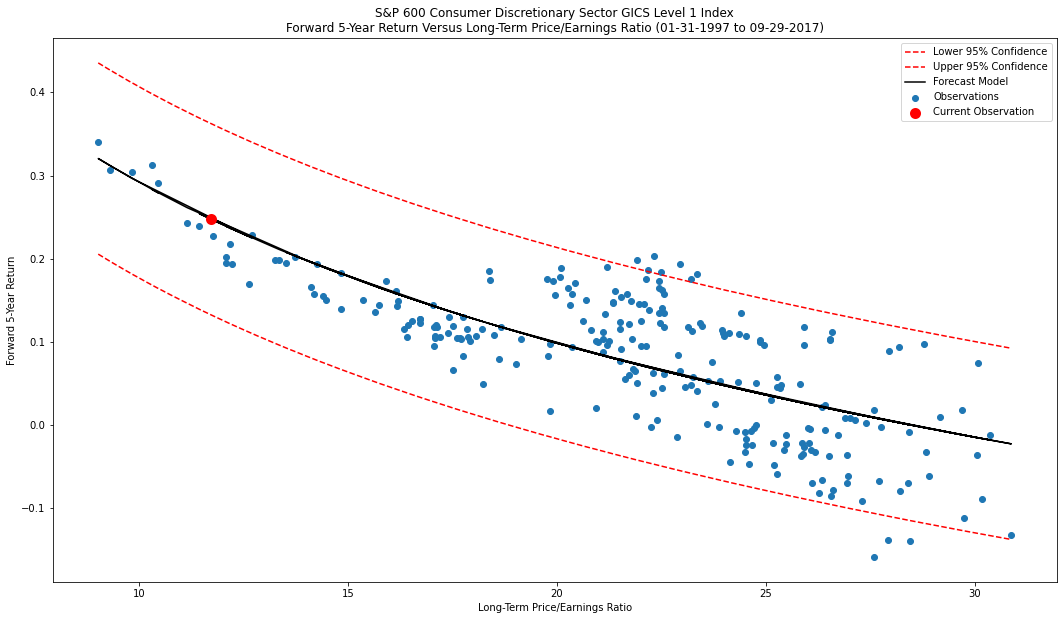

In [12]:
Image('https://raw.githubusercontent.com/nathanramoscfa/cape/main/charts/sample_regression_{}.png'.format(index_ticker))

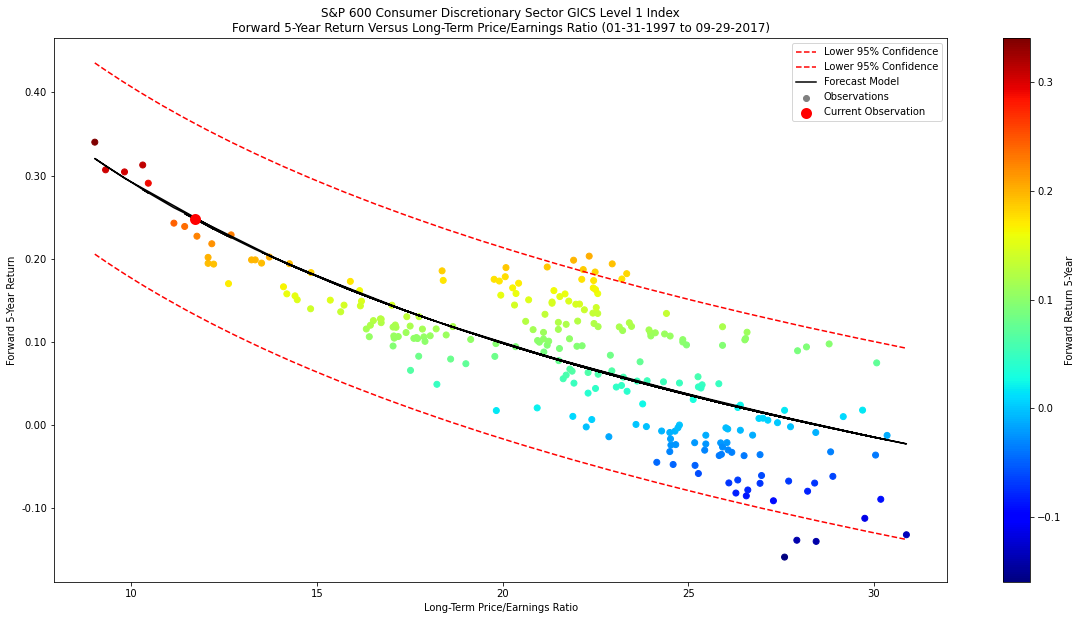

In [13]:
Image('https://raw.githubusercontent.com/nathanramoscfa/cape/main/charts/sample_regression_heatmap_{}.png'.format(index_ticker))

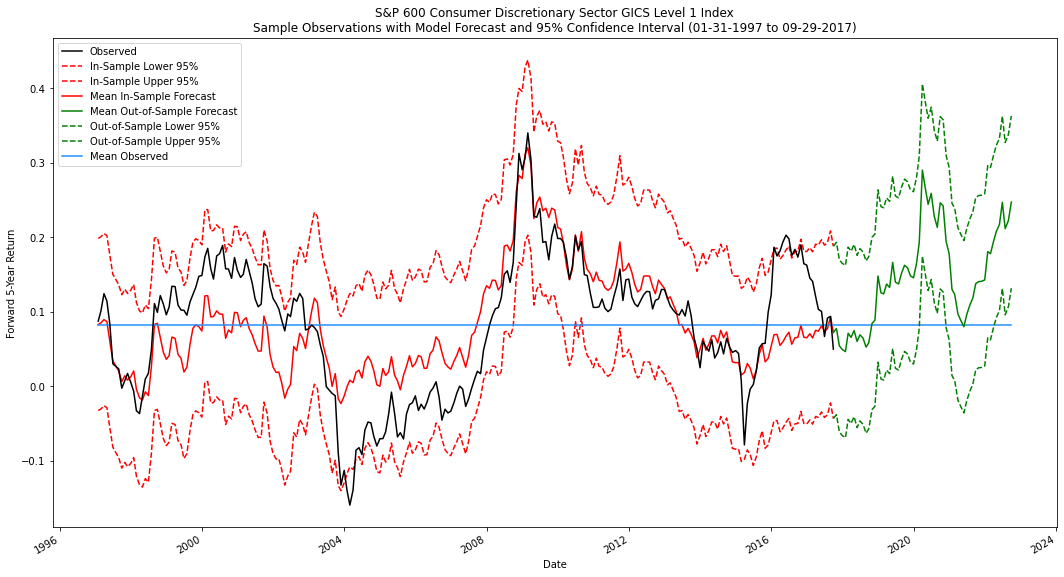

In [14]:
Image('https://raw.githubusercontent.com/nathanramoscfa/cape/main/charts/sample_observed_forecast_{}.png'.format(index_ticker))

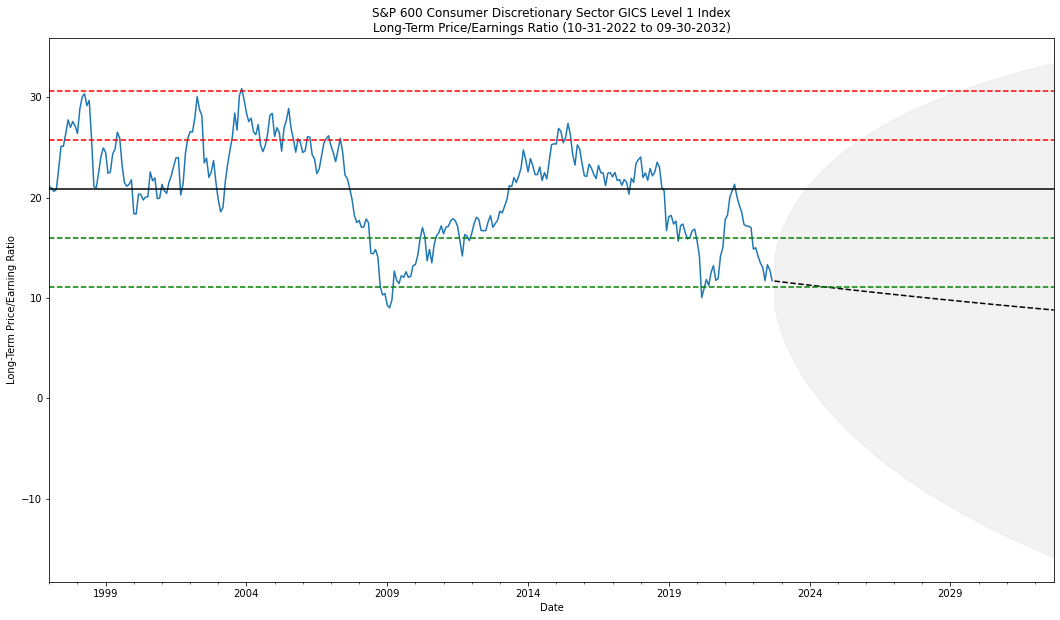

In [15]:
Image('https://raw.githubusercontent.com/nathanramoscfa/cape/main/charts/long_term_pe_ratio_{}.png'.format(index_ticker))

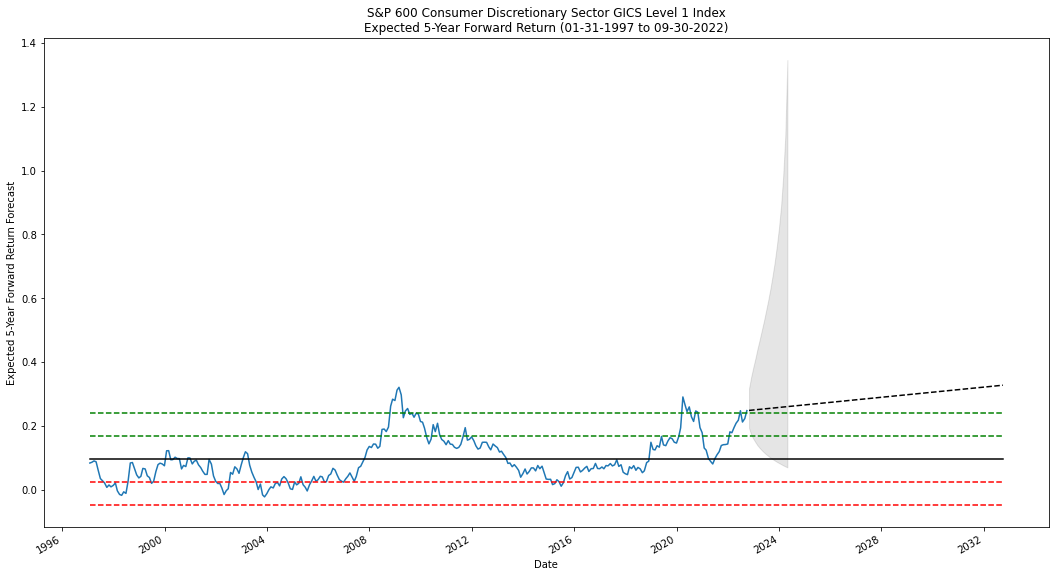

In [16]:
Image('https://raw.githubusercontent.com/nathanramoscfa/cape/main/charts/expected_fwd_return_5y_{}.png'.format(index_ticker))